In [25]:
from PIL import Image, ImageTransform, ImageFilter
img = Image.open("c:/tmp/tmp6sgmpo.png")
if hasattr(img, "width"):
    width, height = img.width, img.height
else:
    width, height = img.size
for x in range(width):
    for y in range(height):
        if img.getpixel((x, y)) < (100, 100, 100):
            img.putpixel((x, y), (255, 255, 255))
import numpy as np
print(np.mean(np.asarray(img)))
gray = img.convert('L')            

193.9752


In [11]:

def GetAverage(mat):
    
    n=len(mat)
    m= width(mat) 
    num = [0]*m
    for j in range(0,m): 
           for i in mat:
              num[j]=num[j]+i[j]           
           num[j]=num[j]/n   
    return num

def width(lst):
    i=0
    for j in lst[0]:
       i=i+1
    return i

def GetVar(average,mat):    
    ListMat=[]
    for i in mat:    
        ListMat.append(list(map(lambda x: x[0]-x[1], zip(average, i))))
   
    n=len(ListMat)
    m= width(ListMat) 
    num = [0]*m
    for j in range(0,m): 
        for i in ListMat:
                  num[j]=num[j]+(i[j]*i[j])       
        num[j]=num[j]/n   
    return num 

def DenoisMat(mat):
    average=GetAverage(mat)
    variance=GetVar(average,mat)
    section=list(map(lambda x: x[0]+x[1], zip(average, variance)))    
    
    n=len(mat)
    m= width(mat) 
    num = [0]*m
    denoisMat=[]    
    for i in mat:
        for j in range(0,m):
               if i[j]>section[j]:
                     i[j]=section[j]
        denoisMat.append(i)  
    return denoisMat                
                        
def AutoNorm(mat):   
    n=len(mat)
    m= width(mat)     
    MinNum=[9999999999]*m
    MaxNum = [0]*m    
    for i in mat:
        for j in range(0,m):
            if i[j]>MaxNum[j]:
                MaxNum[j]=i[j]
      
    for p in mat:     
        for q in range(0,m):
            if p[q]<=MinNum[q]:
                    MinNum[q]=p[q]  
                          
    section=list(map(lambda x: x[0]-x[1], zip(MaxNum, MinNum)))
    print section
    NormMat=[]
     
    for k in mat:     
             
          distance=list(map(lambda x: x[0]-x[1], zip(k, MinNum)))
          value=list(map(lambda x: x[0]/x[1], zip(distance,section)))
          NormMat.append(value)           
    return NormMat        
    

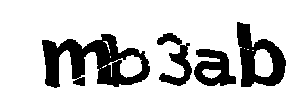

In [36]:
two = gray.point(lambda p: 0 if 68 < p < 90 else 256)
min_res = two.filter(ImageFilter.MinFilter)
med_res = min_res.filter(ImageFilter.MedianFilter)
min_res

In [43]:
import pytesseract
print(pytesseract.image_to_string(med_res,lang='eng'))
gray.point?

ntb3ab
